## Интеллектуальный анализ данных – весна 2025
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* Если в задании есть вопрос на рассуждение, то за отсутствие ответа на него балл за задание будет снижен вполовину.

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать с усеченным датасетом `Palmer Penguins`, содержащим информацию о характеристиках трех видов пингвинов: `Adelie`, `Chinstrap` и `Gentoo`:



*   Species — вид пингвина (целевая переменная).
*   Island — остров, на котором была сделана запись.
*   Clutch Completion — завершенность кладки яиц.
*   Date Egg — закодированная дата откладки яиц (число дней от самой ранней даты в данных).
*   Culmen Length (mm) — длина клюва.
*   Culmen Depth (mm) — глубина клюва.
*   Flipper Length (mm) — длина ласт.
*   Body Mass (g) — масса тела в граммах.
*   Sex — пол особи.
*   Delta 15 N (o/oo) и Delta 13 C (o/oo) — изотопные значения, характеризующие пищевые предпочтения.

Описание полного набора данных и дополнительную информацию о проекте можно найти [здесь](https://allisonhorst.github.io/palmerpenguins/index.html) и [здесь](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download).

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)



In [809]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

In [616]:
data = pd.read_csv('penguins_data.csv')
data

,Species,Island,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Chinstrap,Dream,Yes,382,50.9,19.1,196.0,3550.0,MALE,10.02372,-24.86594
1,Chinstrap,Dream,Yes,741,45.2,17.8,198.0,3950.0,FEMALE,8.88942,-24.49433
2,Gentoo,Biscoe,Yes,744,46.5,13.5,210.0,4550.0,FEMALE,7.99530,-25.32829
3,Chinstrap,Dream,Yes,10,45.2,16.6,191.0,3250.0,FEMALE,9.62357,-24.78984
4,Gentoo,Biscoe,Yes,13,48.4,14.4,203.0,4625.0,FEMALE,8.16582,-26.13971
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,Yes,382,47.6,18.3,195.0,3850.0,FEMALE,8.83502,-24.65859
340,Adelie,Torgersen,Yes,382,39.7,18.4,190.0,3900.0,MALE,9.29808,-25.23453
341,Adelie,Biscoe,Yes,16,38.6,17.2,199.0,3750.0,FEMALE,8.77322,-26.48973
342,Gentoo,Biscoe,Yes,392,46.6,14.2,210.0,4850.0,FEMALE,8.38289,-26.86352


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные признаки? Если да, то закодируйте их самым оптимальным способом. Аргументируйте свой выбор.

In [619]:
print(data.isnull().sum(), end='\n\n')

Species                 0
Island                  0
Clutch Completion       0
Date Egg                0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
Delta 15 N (o/oo)      14
Delta 13 C (o/oo)      13
dtype: int64



действительно много строк с пропущенными значениями, заменим их. Для кодирования переменной Clutch Completion и Sex заменим Yes/male на 1, No/female на 0, эти переменные принимают всего два значения. Для Island же воспользуемся Ono hot encoder, посокльку островов как минимум 3 и, как мне кажется, то, на каком острове находится пингвин будет влиять на целевую переменную гораздо больше, чем остальные признаки. В процессе я также выяснил что есть сраная точка в столбце Sex, я ее дропнул, она мне все ломала блин

In [622]:
data = data.dropna()
data = data.drop(data[data['Sex'] == '.'].index)
data['Sex'] = data['Sex'].replace({'MALE':1, 'FEMALE':0})
data['Clutch Completion'] = data['Clutch Completion'].replace({'Yes': 1, 'No': 0})
data['Species'] = data['Species'].replace({'Chinstrap':0, 'Gentoo':1, 'Adelie':2})
data = pd.get_dummies(data, ['Island'])
data['Island_Biscoe'] = data['Island_Biscoe'].replace({True:1, False:0})
data['Island_Dream'] = data['Island_Dream'].replace({True:1, False:0})
data['Island_Torgersen'] = data['Island_Torgersen'].replace({True:1, False:0})
data

C:\Users\1\AppData\Local\Temp\ipykernel_9008\2833079834.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'] = data['Sex'].replace({'MALE':1, 'FEMALE':0})
C:\Users\1\AppData\Local\Temp\ipykernel_9008\2833079834.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Clutch Completion'] = data['Clutch Completion'].replace({'Yes': 1, 'No': 0})
C:\Users\1\AppData\Local\Temp\ipykernel_9008\2833079834.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the

,Species,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
0,0,1,382,50.9,19.1,196.0,3550.0,1,10.02372,-24.86594,0,1,0
1,0,1,741,45.2,17.8,198.0,3950.0,0,8.88942,-24.49433,0,1,0
2,1,1,744,46.5,13.5,210.0,4550.0,0,7.99530,-25.32829,1,0,0
3,0,1,10,45.2,16.6,191.0,3250.0,0,9.62357,-24.78984,0,1,0
4,1,1,13,48.4,14.4,203.0,4625.0,0,8.16582,-26.13971,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0,1,382,47.6,18.3,195.0,3850.0,0,8.83502,-24.65859,0,1,0
340,2,1,382,39.7,18.4,190.0,3900.0,1,9.29808,-25.23453,0,0,1
341,2,1,16,38.6,17.2,199.0,3750.0,0,8.77322,-26.48973,1,0,0
342,1,1,392,46.6,14.2,210.0,4850.0,0,8.38289,-26.86352,1,0,0


Целевую категориальную переменную закодируйте в ординальном порядке: Chinstrap = 0, Gentoo = 1, Adelie = 2. Можно воспользоваться [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html).

Теперь сохраним информацию о признаках в переменную
`X`, а о целевой переменной – в переменную `y`.

In [625]:
x = data.drop(columns='Species')
y = data['Species']
x

,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Island_Biscoe,Island_Dream,Island_Torgersen
0,1,382,50.9,19.1,196.0,3550.0,1,10.02372,-24.86594,0,1,0
1,1,741,45.2,17.8,198.0,3950.0,0,8.88942,-24.49433,0,1,0
2,1,744,46.5,13.5,210.0,4550.0,0,7.99530,-25.32829,1,0,0
3,1,10,45.2,16.6,191.0,3250.0,0,9.62357,-24.78984,0,1,0
4,1,13,48.4,14.4,203.0,4625.0,0,8.16582,-26.13971,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
339,1,382,47.6,18.3,195.0,3850.0,0,8.83502,-24.65859,0,1,0
340,1,382,39.7,18.4,190.0,3900.0,1,9.29808,-25.23453,0,0,1
341,1,16,38.6,17.2,199.0,3750.0,0,8.77322,-26.48973,1,0,0
342,1,392,46.6,14.2,210.0,4850.0,0,8.38289,-26.86352,1,0,0


In [627]:
y

0      0
1      0
2      1
3      0
4      1
      ..
339    0
340    2
341    2
342    1
343    2
Name: Species, Length: 324, dtype: int64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [630]:
np.random.seed(228)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, stratify = y)

strtify отвечает за то, чтобы выборка тестовая и тренировочная была с таким же отношением рапсределения классов, как и в исходной выборке, в нашем случае будет при разбиении примерно одинаковое отношение долей видов пингвинов в тренировочной и тестовой выборке. Это важно, чтобы не случилось такой ситуации, где все пингвины одного вида случайно попали в тест, а модель не видела их ни разу

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака:  `Flipper Length (mm)` и `Body Mass (g)`  – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [634]:
x_train1 = x_train[['Flipper Length (mm)', 'Body Mass (g)']]
x_test1 = x_test[['Flipper Length (mm)', 'Body Mass (g)']]

scaler = StandardScaler()
x_train1 = scaler.fit_transform(x_train1)
x_test1 = scaler.transform(x_test1)

#1
clf1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf1.fit(x_train1, y_train)
y_train_pred = clf1.predict(x_train1)
y_test_pred = clf1.predict(x_test1)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 1:')
print(f'train: {np.round(train_accuracy, 2)}')
print(f'test: {np.round(test_accuracy, 2)}\n')

для 1:
train: 0.96
test: 0.76



In [636]:
#3
clf3 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf3.fit(x_train1, y_train)
y_train_pred = clf3.predict(x_train1)
y_test_pred = clf3.predict(x_test1)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 3:')
print(f'train: {np.round(train_accuracy, 2)}')
print(f'test: {np.round(test_accuracy, 2)}')

для 3:
train: 0.86
test: 0.72


In [638]:
#5
clf5 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf5.fit(x_train1, y_train)
y_train_pred = clf5.predict(x_train1)
y_test_pred = clf5.predict(x_test1)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 5:')
print(f'train: {np.round(train_accuracy, 2)}')
print(f'test: {np.round(test_accuracy, 2)}')

для 5:
train: 0.85
test: 0.79


In [640]:
#10
clf10 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf10.fit(x_train1, y_train)
y_train_pred = clf10.predict(x_train1)
y_test_pred = clf10.predict(x_test1)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 10:')
print(f'train: {np.round(train_accuracy, 2)}')
print(f'test: {np.round(test_accuracy, 2)}')

для 10:
train: 0.84
test: 0.81


In [642]:
#15
clf15 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
clf15.fit(x_train1, y_train)
y_train_pred = clf15.predict(x_train1)
y_test_pred = clf15.predict(x_test1)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 15:')
print(f'train: {np.round(train_accuracy, 2)}')
print(f'test: {np.round(test_accuracy, 2)}')

для 15:
train: 0.83
test: 0.78


In [644]:
#25
clf25 = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
clf25.fit(x_train1, y_train)
y_train_pred = clf25.predict(x_train1)
y_test_pred = clf25.predict(x_test1)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 25:')
print(f'train: {np.round(train_accuracy, 2)}')
print(f'test: {np.round(test_accuracy, 2)}')

для 25:
train: 0.82
test: 0.81


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [256]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 660.6 kB/s eta 0:00:03
   --- ------------------------------------ 0.1/1.4 MB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.4 MB 2.3 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 5.7 MB/s eta 0:00:00


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [259]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

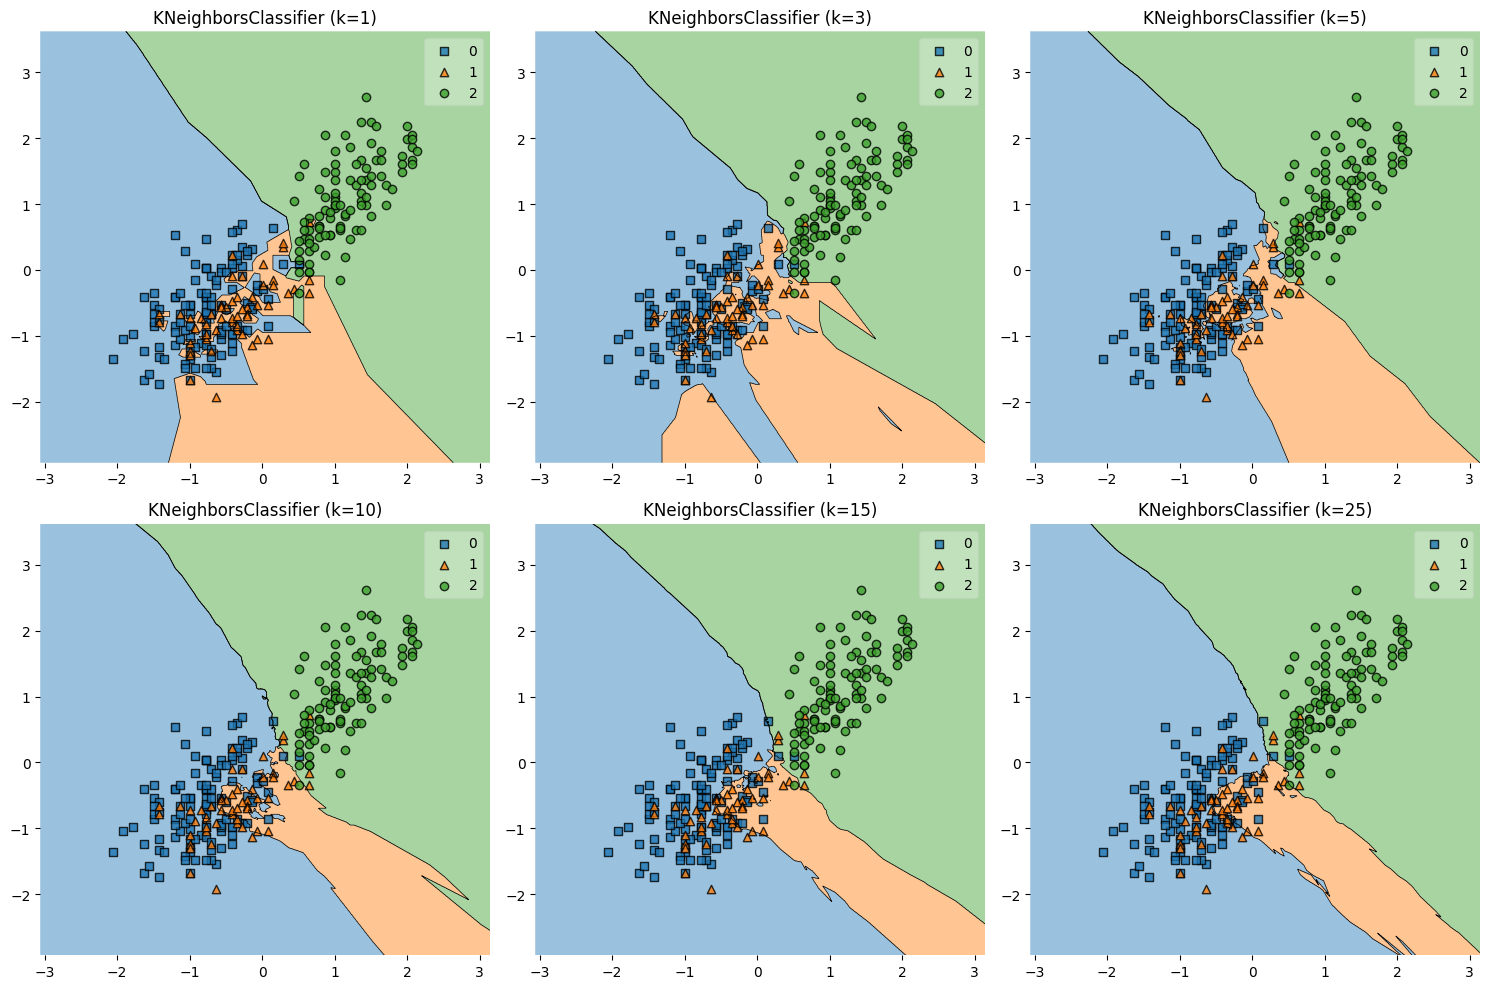

In [ ]:
# В примере пингвинчики закодированы в алфавитном порядке, ваш вариант будет отличаться.

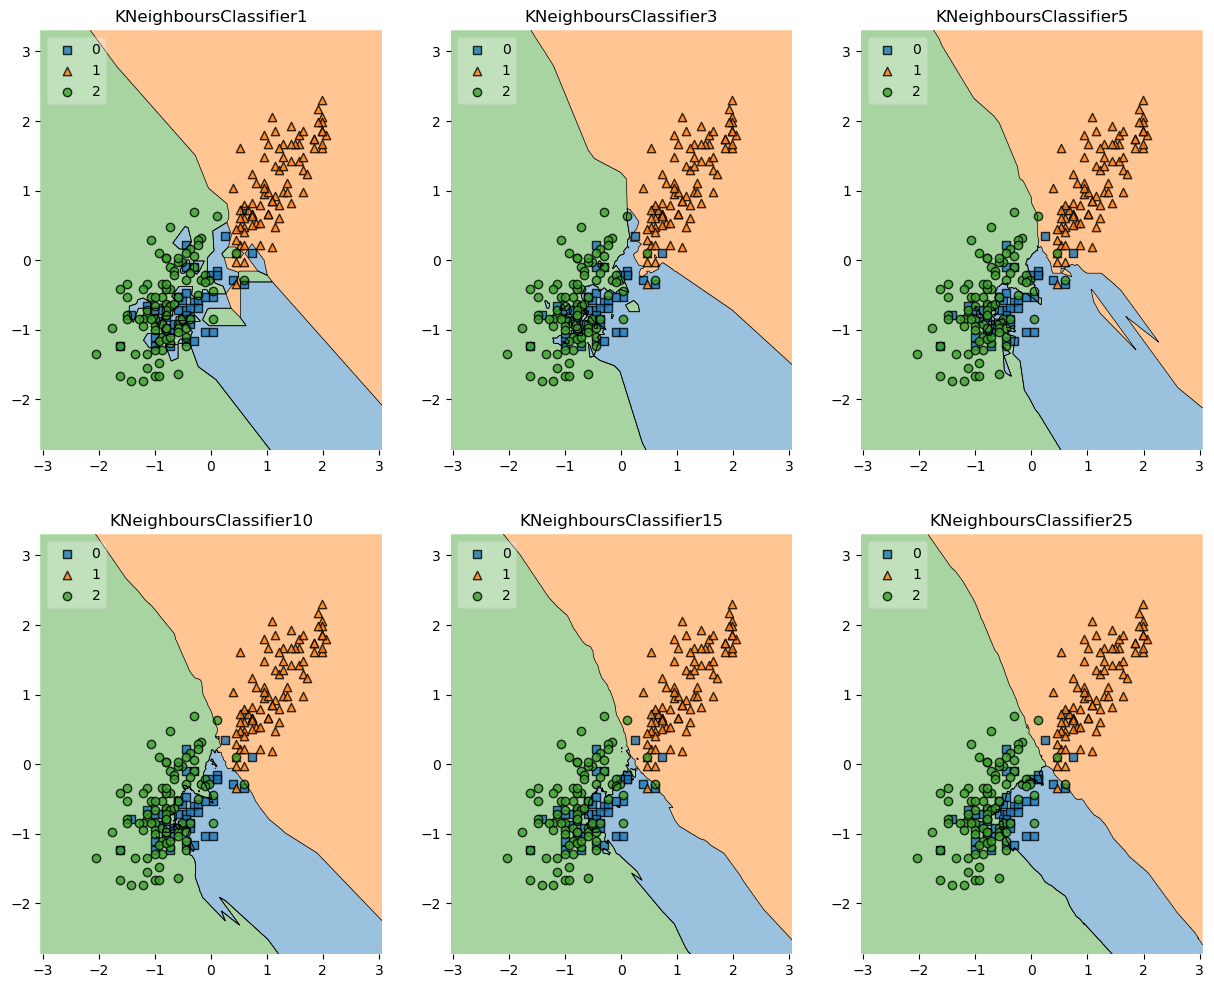

In [280]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,12))

labels = ['KNeighboursClassifier1', 'KNeighboursClassifier3', 'KNeighboursClassifier5', 'KNeighboursClassifier10',
          'KNeighboursClassifier15', 'KNeighboursClassifier25']
for clf, lab, grd in zip([clf1, clf3, clf5, clf10, clf15, clf25],labels, itertools.product(range(2), range(3))):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=np.array(x_train1), y=np.array(y_train), clf=clf, legend=2)
    plt.title(lab)

plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Главный признак переобучения - острые углы и изолированные вершины одного цвета внутри объектов другого типа. Например при к = 1, 3 или 5 явно видны как острые углы, так и изолированные точки. При 10 и 15 есть шероховатости, а при к = 25 очень ровные границы получились, а также одна их лучших точностей по тестовой выборке. Значит оптимально к = 25

### Задание 2. KNN своими руками. 2,5 балла

**Задача 2.1 (2 балла)** В данном задании мы попробуем реализовать алгоритм KNN своими руками, делать мы будем KNN именно для классификации.

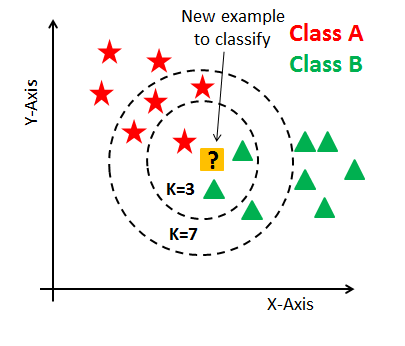

Рекомендации по реализации:
- Используйте `numpy` для представления данных в виде массивов, чтобы минимизировать преобразования.
- Избегайте циклов по всем объектам, по возможности используйте векторизированные операции.
- Обратите внимание на методы [np.linalg.norm()](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) и [np.argsort()](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html), а также на класс `collections.Counter`.
- Особый плюс, если учтёте обработку возможных ошибок.

In [647]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k
        self.x = 0
        self.y = 0

    def fit(self, x, y):
        self.x = np.array(x)
        self.y = np.array(y)

    def predict(self, x):
        x = np.array(x)
        pred = []
        for i in x:
            dist = [self.count_distance(i, j) for j in self.x]
            kni = np.argsort(dist)[:self.k]
            pered_pred = Counter([self.y[j] for j in kni])
            pred.append(int(pered_pred.most_common(1)[0][0]))
        return np.array(pred)
        
    def count_distance(self, x, y):
        return np.linalg.norm(x - y)


In [649]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [651]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

**Задача 2.2 (0.5 балла)** Протестируйте ваш алгоритм на данных о пингвинах. Выведите лучший получившийся результат на тестовой выборке.

In [654]:
scaler = StandardScaler()
x_train2 = scaler.fit_transform(x_train) # эти данные были разделены еще в задании 1.2, чтобы везде было одно и то же
x_test2 = scaler.transform(x_test)
#1
clf1 = KNN(k=1)
clf1.fit(x_train2, y_train)
y_train_pred = clf1.predict(x_train2)
y_test_pred = clf1.predict(x_test2)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 1:')
print(f'train: {np.round(train_accuracy, 5)}')
print(f'test: {np.round(test_accuracy, 5)}')

для 1:
train: 1.0
test: 0.97959


In [656]:
#3
clf1 = KNN(k=3)
clf1.fit(x_train2, y_train)
y_train_pred = clf1.predict(x_train2)
y_test_pred = clf1.predict(x_test2)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 3:')
print(f'train: {np.round(train_accuracy, 5)}')
print(f'test: {np.round(test_accuracy, 5)}')

для 3:
train: 0.99558
test: 0.9898


In [658]:
#5
clf1 = KNN(k=5)
clf1.fit(x_train2, y_train)
y_train_pred = clf1.predict(x_train2)
y_test_pred = clf1.predict(x_test2)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 5:')
print(f'train: {np.round(train_accuracy, 5)}')
print(f'test: {np.round(test_accuracy, 5)}')

для 5:
train: 0.99558
test: 0.97959


In [660]:
#10
clf1 = KNN(k=10)
clf1.fit(x_train2, y_train)
y_train_pred = clf1.predict(x_train2)
y_test_pred = clf1.predict(x_test2)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 10:')
print(f'train: {np.round(train_accuracy, 5)}')
print(f'test: {np.round(test_accuracy, 5)}')

для 10:
train: 1.0
test: 0.96939


In [662]:
#15
clf1 = KNN(k=15)
clf1.fit(x_train2, y_train)
y_train_pred = clf1.predict(x_train2)
y_test_pred = clf1.predict(x_test2)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 15:')
print(f'train: {np.round(train_accuracy, 5)}')
print(f'test: {np.round(test_accuracy, 5)}')

для 15:
train: 0.97345
test: 0.95918


In [664]:
#25
clf1 = KNN(k=25)
clf1.fit(x_train2, y_train)
y_train_pred = clf1.predict(x_train2)
y_test_pred = clf1.predict(x_test2)
train_accuracy = np.mean(y_train == y_train_pred)
test_accuracy = np.mean(y_test == y_test_pred) 
print(f'для 25:')
print(f'train: {np.round(train_accuracy, 5)}')
print(f'test: {np.round(test_accuracy, 5)}')

для 25:
train: 0.97345
test: 0.96939


Итого лучший получился при к = 3: 0.9898 на тестовой выборке

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [854]:
data = pd.read_csv('diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [858]:
print(data.isnull().sum(), end='\n\n')

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64



Значит пустых ячеек нет, но приэтом есть столбец unnamed: 0, который, наверное, должен быть аналогом индекса строчки, он не несет никакой информации о камне, поэтому его можно выкинуть (в отличии от веса, размера, прозрачности камня и других, все они так или иначе могут влиять на цену)

In [861]:
data = data.drop(columns='Unnamed: 0')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.2 (0.2 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Постройте матрицу корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки имеют наибольшую корреляцию с целевой переменной?

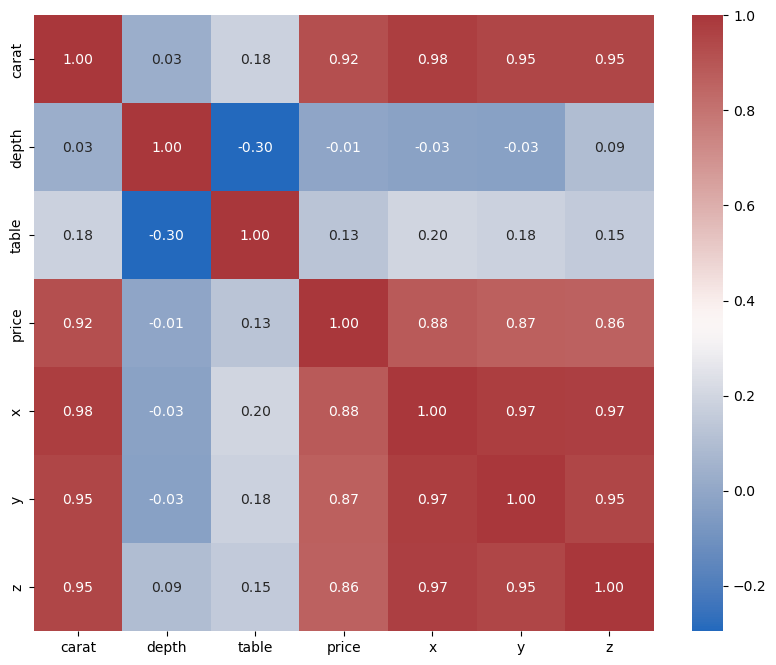

In [864]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(numeric_only=True), annot=True,cmap='vlag', fmt='0.2f')
plt.show()

Смотреть нужно на 4 строчку, наибольшая корелляция у цены с весом в каратах, его размеры также сильно кореллируют с ценой, поскольку между весом и резмерами тоже высокая корелляция. Признак depth практически независим от цены, table чуть более коррелирует, но очень слабо

**Задача 3.3 (0.2 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные признаки методом OneHot-кодирования (`pd.get_dummies()` или `OneHotEncoder` из `sklearn`).

In [868]:
data = pd.get_dummies(data)
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,False,True,False,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,False,True,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,False,...,False,False,False,False,False,True,False,False,False,False


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [871]:
np.random.seed(228)
x = data.drop(columns='price')
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче стандартизируйте вещественные признаки в тренировочной и тестовой выборках с помощью `StandardScaler`.

Объясните, как это повлияет на интерпретацию коэффициентов линейной регрессии.

In [875]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

модель станет менее чувствительна к выбросам, приэтом не теряя в качетсве

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [879]:
lr = LinearRegression().fit(x_train, y_train)
print(f"Train: {mean_squared_error(y_train, lr.predict(x_train))}")
print(f"Test: {mean_squared_error(y_test, lr.predict(x_test))}")

Train: 1277610.8116990263
Test: 1276851.1818104477


**Задача 3.7 (0.3 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [882]:
for i, j in zip(lr.coef_, x.columns):
    print(f'{j}: {i}')

carat: 5335.133617897195
depth: -76.93032012311812
table: -42.71042070386416
x: -1064.568817658015
y: 7.737644039584438
z: -102.17473669682408
cut_Fair: 123248288436972.64
cut_Good: 206736456193071.6
cut_Ideal: 351984890881969.1
cut_Premium: 313197817365235.5
cut_Very Good: 299154235583668.44
color_D: 5576144665882027.0
color_E: 6480157575908834.0
color_F: 6437765217408696.0
color_G: 6845367158362746.0
color_H: 6081687468719964.0
color_I: 5017242295420292.0
color_J: 3754104906194410.0
clarity_I1: 1187612975174251.0
clarity_IF: 1815998795372148.8
clarity_SI1: 4352401398919413.5
clarity_SI2: 3810082846422630.0
clarity_VS1: 3630303285578411.0
clarity_VS2: 4254149533096761.5
clarity_VVS1: 2530795994970006.5
clarity_VVS2: 2960866942349001.5


мы видим нормальные веса у карат (веса), и Х, самые большие, не считая того, что модель переобучилась дала огроменные веса каждому типу cut, color и clarity

**Задача 3.8 (0.5 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, установив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [886]:
laso = Lasso(alpha=10)
laso.fit(x_train, y_train)
print(f"Lasso Train: {mean_squared_error(laso.predict(x_train), y_train)}")
print(f"Lasso Test: {mean_squared_error(laso.predict(x_test), y_test)}")

rige = Ridge(alpha=10)
rige.fit(x_train, y_train)
print(f"Ridge Train: {mean_squared_error(rige.predict(x_train), y_train)}")
print(f"Ridge Test: {mean_squared_error(rige.predict(x_test), y_test)}")

Lasso Train: 1287953.8323483202
Lasso Test: 1286234.399638143
Ridge Train: 1277434.8716834844
Ridge Test: 1276577.1753149692


In [888]:
for i, j in zip(laso.coef_, x.columns):
    print(f'{j}: {i}')

carat: 4885.49968161749
depth: -45.89504796329411
table: -33.22080971344838
x: -607.712319967747
y: -0.0
z: -123.27265037756608
cut_Fair: -129.47112820826086
cut_Good: -37.66694648959186
cut_Ideal: 57.37002844231416
cut_Premium: 0.0
cut_Very Good: -0.0
color_D: 143.35172792685114
color_E: 92.19045790974211
color_F: 67.26807145381417
color_G: -0.0
color_H: -166.18483539869996
color_I: -282.50896689643565
color_J: -405.56974351446036
clarity_I1: -484.52775620366083
clarity_IF: 188.6893131737598
clarity_SI1: -264.31536123192
clarity_SI2: -579.3501307393125
clarity_VS1: 100.31026067618377
clarity_VS2: -0.0
clarity_VVS1: 177.95137869604937
clarity_VVS2: 194.09503610457122


С кайфом, Лассо обнулила несколько признаков и теперь модель не имеет таких ужасно больших весов. Закономерности остались все те же, наибольший вес - карат, далее Х.

In [891]:
for i, j in zip(rige.coef_, x.columns):
    print(f'{j}: {i}')

carat: 5298.133723320986
depth: -75.92118343805805
table: -46.27810148760728
x: -1008.3104397490664
y: 1.6364573100903583
z: -117.27702786643148
cut_Fair: -130.05980954313935
cut_Good: -39.78085313753222
cut_Ideal: 61.197426555798835
cut_Premium: 10.099694853234974
cut_Very Good: -1.5041417327487443
color_D: 206.79991525599502
color_E: 162.202654966787
color_F: 137.7065830966579
color_G: 56.54882204598155
color_H: -122.97309816683854
color_I: -253.30930970132675
color_J: -388.65908412590255
clarity_I1: -466.3351481487721
clarity_IF: 241.68718071934217
clarity_SI1: -153.29840484476398
clarity_SI2: -491.3858164078677
clarity_VS1: 205.86986610689866
clarity_VS2: 108.08885139799663
clarity_VVS1: 248.07227161782674
clarity_VVS2: 276.7238183870339


Здесь наверное тот же вывод, что и про лассо, только некоторые признаки не опускались, в итоге модель более точная на тестовой выборке, чем простая регрессия и лассо

**Задача 3.9 (0.5 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод сильнее снижает норму коэффициентов? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\1\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.535e+08, tolerance: 5.994e+07
  model = cd_fast.enet_coordinate_descent(


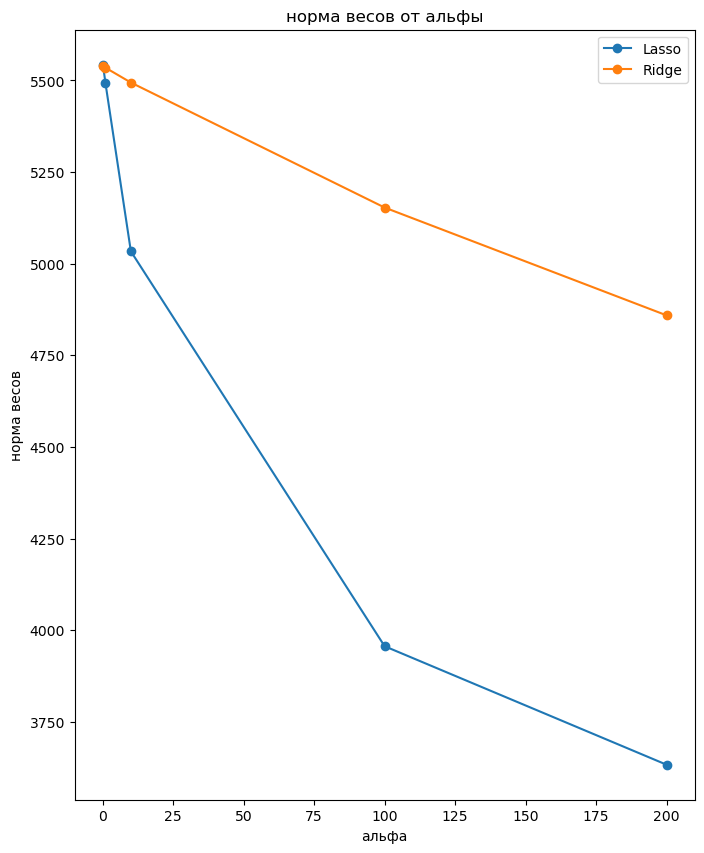

In [895]:
kubik = pd.DataFrame(columns=['a', 'Lasso', 'Ridge'])
chert = [0.1, 1, 10, 100, 200]
for i in range(len(chert)):
    laso = Lasso(alpha=chert[i]).fit(x_train, y_train)
    rige = Ridge(alpha=chert[i]).fit(x_train, y_train)
    kubik.loc[i] = [chert[i], np.linalg.norm(laso.coef_),np.linalg.norm(rige.coef_)]

plt.figure(figsize=(8, 10))
plt.plot(kubik['a'], kubik['Lasso'], label='Lasso', marker='o')
plt.plot(kubik['a'], kubik['Ridge'], label='Ridge', marker='o')
plt.xlabel('альфа')
plt.ylabel('норма весов')
plt.legend()
plt.title('норма весов от альфы')
plt.show()
    
    

Тут явно видно, что лассоснижает норму коэффициентов гораздо сильнее чем ридж. Чаще используется, наверное, потому, что обнуляет неважные признаки, когда как ридж оставляет их, просто с малыми весами. Главное не перестараться и не обнулить реально важные признаки :)

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [899]:
lasocv = LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5).fit(x_train, y_train)
kekw = lasocv.mse_path_
kekw

array([[1823270.57048184, 2075763.78423669, 1878452.18661577,
        2051585.27597172, 1927472.92193064],
       [1416520.63948488, 1629125.91006589, 1481295.0837575 ,
        1614627.99941469, 1518246.29363908],
       [1193463.15724031, 1350930.9438436 , 1248231.02258551,
        1362508.91180918, 1300241.86962729],
       [1180832.00323033, 1333147.08404754, 1236153.27005483,
        1357438.7718189 , 1297136.59227082],
       [1181034.64834176, 1332229.86108504, 1235751.06044496,
        1357889.5366226 , 1297935.42148804]])

In [901]:
meanKekw = np.mean(kekw, axis=1)
meanKekw

array([1951308.94784733, 1531963.18527241, 1291075.18102118,
       1280941.54428448, 1280968.10559648])

In [903]:
ind = lasocv.alphas_
print(f'Оптимальное значение альфа = {ind[np.argmin(meanKekw)]}')

Оптимальное значение альфа = 1.0


In [905]:
for i, j in zip(meanKekw, ind):
    print(f'Среднеквадратичная ошибка при альфа {j} равна {i}')

Среднеквадратичная ошибка при альфа 200.0 равна 1951308.9478473342
Среднеквадратичная ошибка при альфа 100.0 равна 1531963.185272408
Среднеквадратичная ошибка при альфа 10.0 равна 1291075.1810211777
Среднеквадратичная ошибка при альфа 1.0 равна 1280941.5442844837
Среднеквадратичная ошибка при альфа 0.1 равна 1280968.1055964788


**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [908]:
laso = Lasso(alpha=1)
laso.fit(x_train, y_train)
for i, j in zip(laso.coef_, x.columns):
    print(f'{j}: {i}')

carat: 5289.582574422589
depth: -76.07722302159551
table: -45.2235463872934
x: -1008.8667027611372
y: -0.0
z: -107.5282764029833
cut_Fair: -133.32263972027735
cut_Good: -45.30628290110526
cut_Ideal: 50.86942806805119
cut_Premium: 0.0
cut_Very Good: -9.613608299472762
color_D: 159.30673961689143
color_E: 107.29335527992299
color_F: 83.23172285314986
color_G: -0.0
color_H: -172.7359666403709
color_I: -294.08766776191123
color_J: -418.96008079875423
clarity_I1: -495.7403272005126
clarity_IF: 194.4947713489479
clarity_SI1: -263.6212240333789
clarity_SI2: -587.6032964606574
clarity_VS1: 112.37757236026236
clarity_VS2: -0.0
clarity_VVS1: 182.70804303980955
clarity_VVS2: 200.43616863041677


Неинформативные признаки - y, cutPremium, colorG, clarityVS2, то есть те, которые обнулились. Наиболее же влиятельные прихнаки все те же - carat и x, чем больше камень => тем он тяжелее => он дороже. Это база

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [912]:
print(f"Lasso Train: {mean_squared_error(laso.predict(x_train), y_train)}")
print(f"Lasso Test: {mean_squared_error(laso.predict(x_test), y_test)}")

Lasso Train: 1277479.3714029463
Lasso Test: 1276383.9349055104


Да, у этой модели не слишком отличается ошибка на тесте и трейне, но главное отличие - модель не переобучена, у нее адекватные веса, не десятизначные, а значит на новых данных модель будет более точная